In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df_raw = pd.read_csv("유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 결측치를 확인합니다.

In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 더미변수 만들기

In [4]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_y = df_raw_dummy["diagnosis"]
df_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (398, 30)
train data y size: (398,)
test data x size: (171, 30)
test data y size: (171,)


### 보다 나은 검정을 위해 정규화를 합니다.

In [6]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 훈련용, 테스트 데이터 셋 만들기

In [7]:
df_scaled_train_x, df_scaled_test_x =  train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
df_train_y, df_test_y = train_test_split(df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_scaled_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_scaled_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (398, 30)
train data y size: (398,)
test data x size: (171, 30)
test data y size: (171,)


In [8]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.907
Scoring on test set: 0.912


In [9]:
train_accuracy = []; test_accuracy = []
para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\cptas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.942
1,40,0.995,0.947
2,60,0.995,0.953
3,80,0.995,0.947
4,100,0.995,0.953
5,120,0.997,0.959
6,140,0.997,0.947
7,160,0.997,0.947


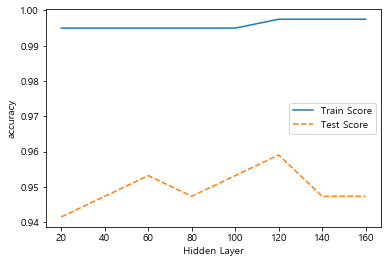

In [10]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

### 히든 레이어는 테스트와 트레인 accuracy가 모두 높은 120을 선택합니다.

In [11]:
train_accuracy = []; test_accuracy = []
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234, hidden_layer_sizes = (120, 120))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation Function"] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

,Activation Function,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.947
1,tanh,1.000,0.971
2,relu,1.000,0.953


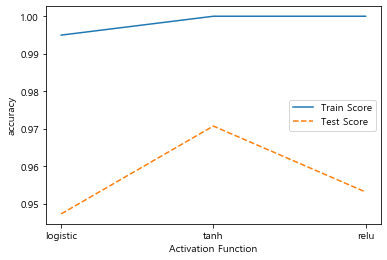

In [12]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

### 함수는 tanh를 선택합니다.

In [13]:
train_accuracy = []; test_accuracy = []
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "tanh", hidden_layer_sizes = (120, 120), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy
df_accuracy_solver.round(3)

C:\Users\cptas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.00,0.965
1,sgd,0.99,0.947
2,adam,1.00,0.971


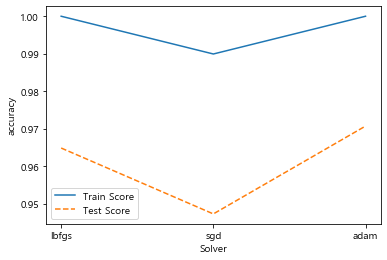

In [14]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

### solver는 adam를 선택합니다. 

In [15]:
train_accuracy = []; test_accuracy = []
para_batch = [20*batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh", hidden_layer_sizes = (120, 120), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.965
1,40,1.0,0.965
2,60,1.0,0.965
3,80,1.0,0.965
4,100,1.0,0.965
5,120,1.0,0.965
6,140,1.0,0.965
7,160,1.0,0.965
8,180,1.0,0.965


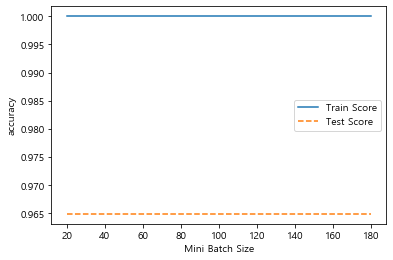

In [16]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

### 배치 사이즈는 차이가 없기 때문에 효율성을 위해 가장 작은 20을 사용합니다.

In [17]:
nn_final = MLPClassifier(batch_size = 20, solver = "adam", activation = "tanh", hidden_layer_sizes = (120, 120),random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
print("Scoring on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Scoring on training set: 1.000
Scoring on test set: 0.965
Confusion matrix: 
[[104   1]
 [  5  61]]


### 최종 모델 결과 훈련용 100%, 테스트 96.5%의 accuracy를 보여주기 때문에 잘 작동한다고 판단할 수 있습니다. confusion matrix는 위와 같습니다.

In [18]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.945
Scoring on test set: 0.936


In [19]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.930
1,2,0.975,0.918
2,3,0.992,0.930
3,4,0.982,0.918
4,5,0.985,0.924
5,6,0.977,0.924
6,7,0.982,0.930
7,8,0.977,0.924
8,9,0.977,0.930
9,10,0.975,0.924


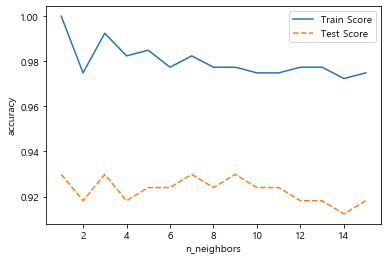

In [20]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

### 훈련과 테스트가 모두 높은 파라미터는 군집이 3일 때이다.

In [21]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1, 11)] * 2
para_weights = (["uniform"]) * 10 + (["distance"] * 10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.930
1,2,uniform,0.975,0.918
2,3,uniform,0.992,0.930
3,4,uniform,0.982,0.918
4,5,uniform,0.985,0.924
5,6,uniform,0.977,0.924
6,7,uniform,0.982,0.930
7,8,uniform,0.977,0.924
8,9,uniform,0.977,0.930
9,10,uniform,0.975,0.924


In [22]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights", values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.929825  0.929825
2                   1.0  0.974874     0.929825  0.918129
3                   1.0  0.992462     0.929825  0.929825
4                   1.0  0.982412     0.929825  0.918129
5                   1.0  0.984925     0.923977  0.923977
6                   1.0  0.977387     0.923977  0.923977
7                   1.0  0.982412     0.929825  0.929825
8                   1.0  0.977387     0.923977  0.923977
9                   1.0  0.977387     0.929825  0.929825
10                  1.0  0.974874     0.929825  0.923977

In [23]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights.columns = level0 + "_" + level1
df_accuracy_weights

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
0,1,uniform,1.000000,0.929825
1,2,uniform,0.974874,0.918129
2,3,uniform,0.992462,0.929825
3,4,uniform,0.982412,0.918129
4,5,uniform,0.984925,0.923977
5,6,uniform,0.977387,0.923977
6,7,uniform,0.982412,0.929825
7,8,uniform,0.977387,0.923977
8,9,uniform,0.977387,0.929825
9,10,uniform,0.974874,0.923977


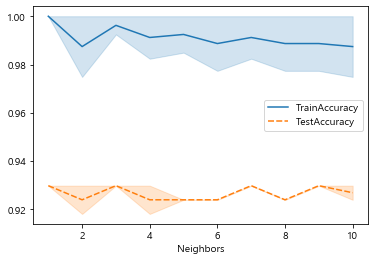

In [24]:
sns.lineplot(data = df_accuracy_weights_pivot)

### 군집이 3일때가 고정이기에, distance와 uniform test accuracy는 같지만 train accuracy가 distance가 더 높기 때문에 distance를 선택한다.

In [25]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1, 11)] * 3
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "distance")
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.0,0.930
1,2,minkowski,1.0,0.930
2,3,minkowski,1.0,0.930
3,4,minkowski,1.0,0.930
4,5,minkowski,1.0,0.924
5,6,minkowski,1.0,0.924
6,7,minkowski,1.0,0.930
7,8,minkowski,1.0,0.924
8,9,minkowski,1.0,0.930
9,10,minkowski,1.0,0.930


In [26]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainAccuracy", "TestAccuracy"])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.0,1.0,1.0,0.929825,0.941520,0.929825
2,1.0,1.0,1.0,0.929825,0.941520,0.929825
3,1.0,1.0,1.0,0.929825,0.929825,0.929825
4,1.0,1.0,1.0,0.929825,0.935673,0.929825
5,1.0,1.0,1.0,0.923977,0.929825,0.923977
6,1.0,1.0,1.0,0.923977,0.929825,0.923977
7,1.0,1.0,1.0,0.929825,0.918129,0.929825
8,1.0,1.0,1.0,0.923977,0.935673,0.923977
9,1.0,1.0,1.0,0.929825,0.923977,0.929825


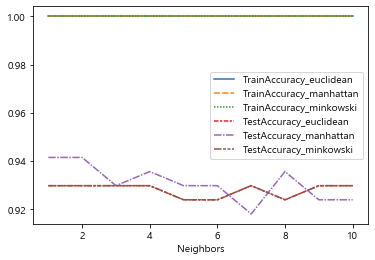

In [27]:
sns.lineplot(data = df_accuracy_metric_pivot)

### 3가지 방법 모두 차이가 없습니다.

In [28]:
knn_final = KNeighborsClassifier(n_neighbors = 3, weights = "distance", metric = "minkowski")
knn_final.fit(df_scaled_train_x, df_train_y)
y_pred = knn_final.predict(df_scaled_test_x)
print("Scoring on training set: {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Scoring on training set: 1.000
Scoring on test set: 0.930
Confusion matrix: 
[[105   0]
 [ 12  54]]


In [29]:
knn_final = KNeighborsClassifier(n_neighbors = 3, weights = "distance", metric = "euclidean")
knn_final.fit(df_scaled_train_x, df_train_y)
y_pred = knn_final.predict(df_scaled_test_x)
print("Scoring on training set: {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Scoring on training set: 1.000
Scoring on test set: 0.930
Confusion matrix: 
[[105   0]
 [ 12  54]]


In [30]:
knn_final = KNeighborsClassifier(n_neighbors = 3, weights = "distance", metric = "manhattan")
knn_final.fit(df_scaled_train_x, df_train_y)
y_pred = knn_final.predict(df_scaled_test_x)
print("Scoring on training set: {:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Scoring on training set: 1.000
Scoring on test set: 0.930
Confusion matrix: 
[[105   0]
 [ 12  54]]


### 최종 모델의 결과 훈련은 100%, 테스트는 93%로 약간의 차이가 존재합니다. confusion matrix는 위와 같습니다.